In [128]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = pd.read_excel("d:/University/DSBD/Lab2/dds_ch2_rollingsales/rollingsales_brooklyn.xls", header=4)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,403572,2013-07-09
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,218010,2013-07-12
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,952311,2013-04-25
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,842692,2013-04-25
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,815288,2013-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3167,8,,E9,1144 FLUSHING AVENUE,,...,0,1,1,10250,6675,1931,4,E9,0,2013-01-17
23369,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3167,69,,E9,349 JEFFERSON STREET,,...,0,1,1,3600,2800,1931,4,E9,0,2013-01-17
23370,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3176,146,,E9,383 TROUTMAN STREET,,...,0,1,1,5017,5000,1972,4,E9,1090000,2012-12-28
23371,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3248,55,,E9,295 STOCKHOLM STREET,,...,0,1,1,2500,2475,1931,4,E9,0,2013-04-17


In [129]:
columns = list(data.columns.values)
columns = columns[:-1]
columns_mean = data.mean()

filtered_data = data.drop_duplicates(subset=columns, keep=False)

filtered_data['ZIP CODE'] = filtered_data['ZIP CODE'].fillna(0)
filtered_data['YEAR BUILT'] = filtered_data['YEAR BUILT'].fillna(0)
filtered_data['TAX CLASS AT PRESENT'] = filtered_data['TAX CLASS AT PRESENT'].fillna(0)
filtered_data['BUILDING CLASS CATEGORY'] = filtered_data['BUILDING CLASS CATEGORY'].fillna(0)
filtered_data['NEIGHBORHOOD'] = filtered_data['NEIGHBORHOOD'].fillna(0)
filtered_data.drop("EASE-MENT", inplace=True, axis=1)
filtered_data = filtered_data[filtered_data['SALE\nPRICE'] != 0]
filtered_data = filtered_data.fillna(columns_mean)
filtered_data['SALE DATE'] = pd.to_datetime(filtered_data['SALE DATE'])

filtered_data


<ipython-input-129-f3b7eff0ba77>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  columns_mean = data.mean()
<ipython-input-129-f3b7eff0ba77>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  columns_mean = data.mean()
<ipython-input-129-f3b7eff0ba77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ZIP CODE'] = filtered_data['ZIP CODE'].fillna(0)
<ipython-input-129-f3b7eff0ba77>:8: SettingWithCopyWarning: 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,342 53RD STREET,,11220,0,0,0,0,0,0,2,R1,403572,2013-07-09
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,342 53RD STREET,,11220,0,0,0,0,0,0,2,R1,218010,2013-07-12
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,952311,2013-04-25
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,842692,2013-04-25
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,815288,2013-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23360,3,WYCKOFF HEIGHTS,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,3250,1006,R1,137 ST NICHOLAS AVENUE,3B,11237,1,0,1,0,0,1931,2,R1,324480,2012-11-15
23362,3,WYCKOFF HEIGHTS,22 STORE BUILDINGS,4,3280,31,K9,146 WYCKOFF AVENUE,,11237,0,1,1,2535,5580,1931,4,K9,1200000,2013-04-24
23365,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3167,7,F4,1138 FLUSHING AVENUE,,11237,0,1,1,2454,2450,1931,4,F4,385000,2013-02-28
23367,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3407,34,G9,940-950 WYCKOFF AVENUE,,11237,0,1,1,7200,3000,1925,4,G9,1110000,2013-05-16


<ipython-input-151-18506c3b7a06>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.mean()


<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Sale price for the whole time'>

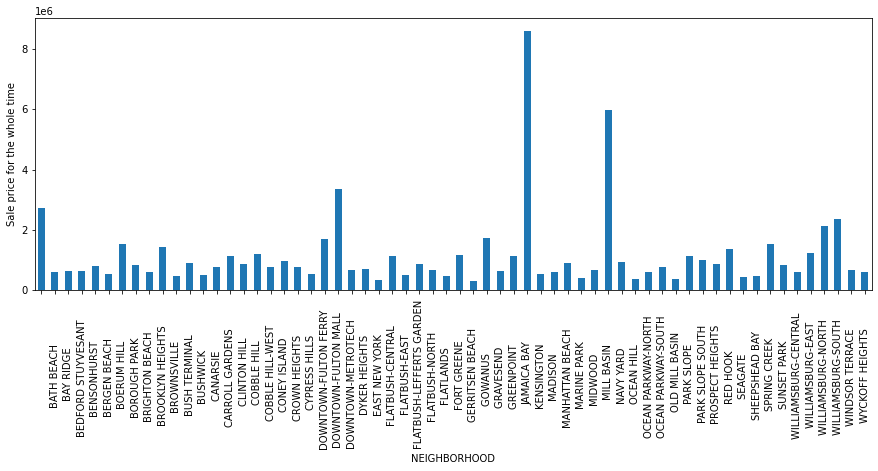

In [151]:
grouped_data = filtered_data.groupby("NEIGHBORHOOD")
grouped_data = grouped_data.mean()
grouped_data['SALE\nPRICE'] = grouped_data['SALE\nPRICE'].astype(int)
grouped_data["SALE\nPRICE"].plot.bar(figsize=(15, 5), ylabel="Sale price for the whole time")

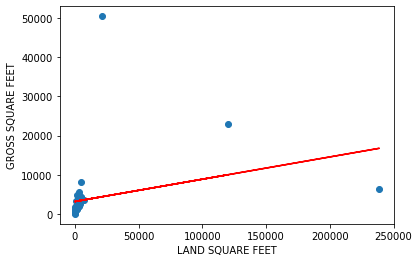

In [131]:
X = grouped_data["LAND SQUARE FEET"].values.reshape(-1, 1)
Y = grouped_data["GROSS SQUARE FEET"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("LAND SQUARE FEET")
plt.ylabel("GROSS SQUARE FEET")
plt.show()

grouped_data.drop("GROSS SQUARE FEET", inplace=True, axis=1)


<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Number of houses sold for the period 2012-09-01 - 2013-01-01'>

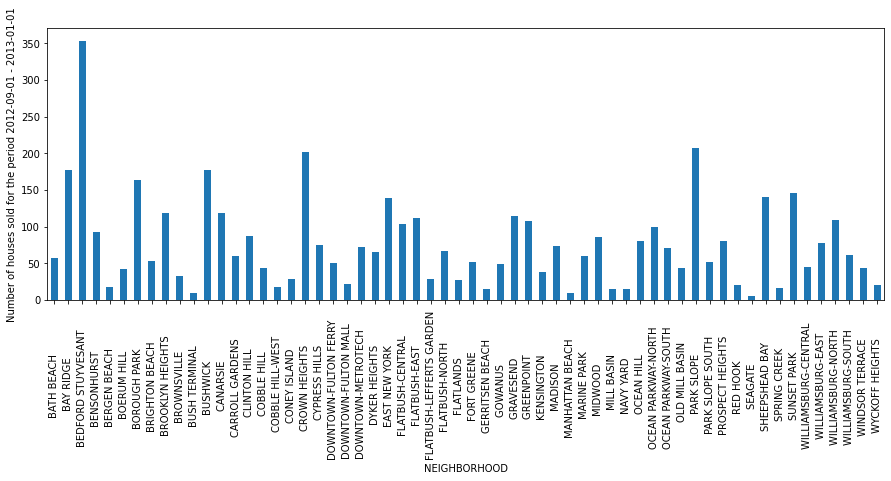

In [132]:
def getSalesWithinDate(start_date, end_date): 
    mask = (filtered_data["SALE DATE"] >= start_date) & (filtered_data["SALE DATE"] < end_date)
    period = filtered_data.loc[mask]
    return period

start_date = "2012-09-01"
end_date = "2013-01-01"

period_sales_4 = getSalesWithinDate(start_date, end_date)
period_sales_4 = period_sales_4.groupby("NEIGHBORHOOD")
period_sales_4["BOROUGH"].count().plot.bar(ylabel="Number of houses sold for the period " + start_date + " - " + end_date,
                                            figsize=(15, 5))

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Number of houses sold for the period 2013-01-01 - 2013-04-01'>

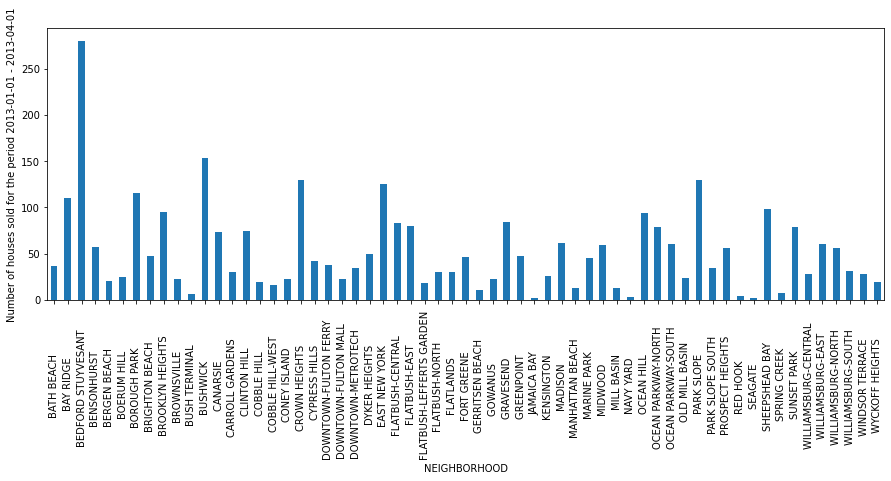

In [133]:
start_date = "2013-01-01"
end_date = "2013-04-01"

period_sales_1 = getSalesWithinDate(start_date, end_date)
period_sales_1 = period_sales_1.groupby("NEIGHBORHOOD")
period_sales_1["BOROUGH"].count().plot.bar(ylabel="Number of houses sold for the period " + start_date + " - " + end_date,
                                            figsize=(15, 5))

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Number of houses sold for the period 2013-04-01 - 2013-07-01'>

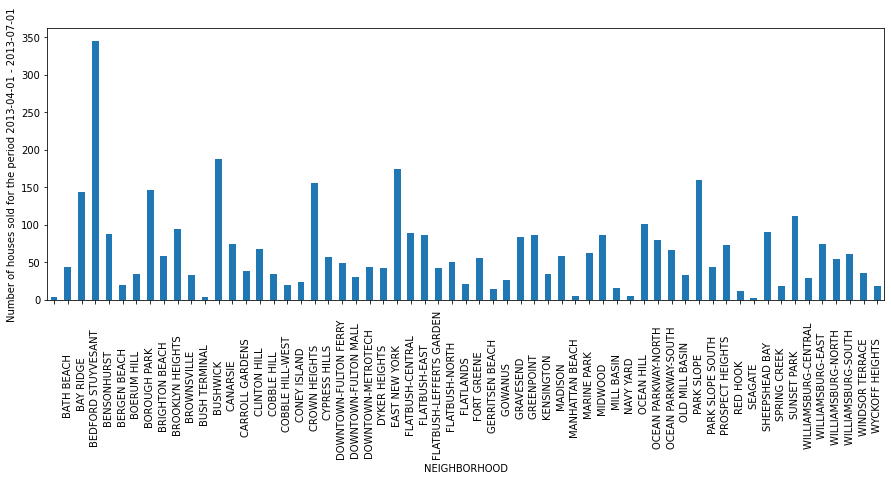

In [134]:
start_date = "2013-04-01"
end_date = "2013-07-01"

period_sales_2 = getSalesWithinDate(start_date, end_date)
period_sales_2 = period_sales_2.groupby("NEIGHBORHOOD")
period_sales_2["BOROUGH"].count().plot.bar(ylabel="Number of houses sold for the period " + start_date + " - " + end_date, 
                                            figsize=(15, 5))

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Number of houses sold for the period 2013-07-01 - 2013-12-01'>

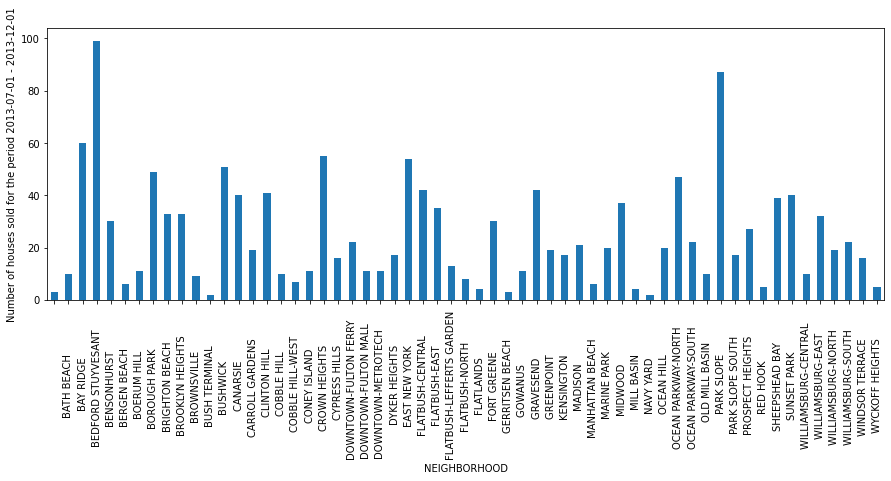

In [135]:
start_date = "2013-07-01"
end_date = "2013-12-01"

period_sales_3 = getSalesWithinDate(start_date, end_date)
period_sales_3 = period_sales_3.groupby("NEIGHBORHOOD")
period_sales_3["BOROUGH"].count().plot.bar(ylabel="Number of houses sold for the period " + start_date + " - " + end_date,
                                            figsize=(15, 5))

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Mean sales price per neighborhood for the 4th period'>

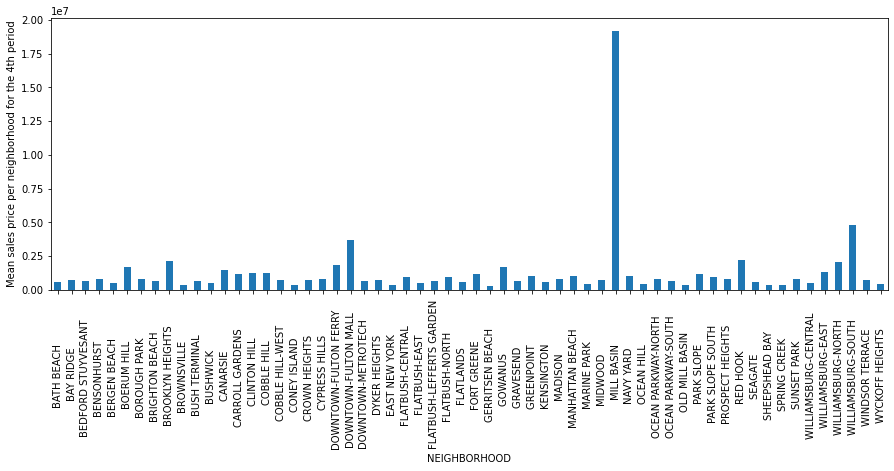

In [136]:
period_sales_4["SALE\nPRICE"].mean().plot.bar(figsize=(15, 5), ylabel="Mean sales price per neighborhood for the 4th period")

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Mean sales price per neighborhood for the 4th period'>

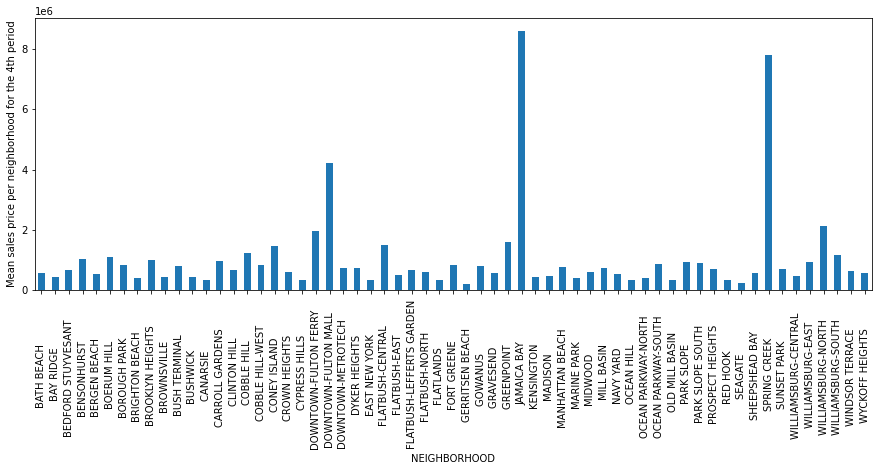

In [137]:
period_sales_1["SALE\nPRICE"].mean().plot.bar(figsize=(15, 5), ylabel="Mean sales price per neighborhood for the 1th period")

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Mean sales price per neighborhood for the 4th period'>

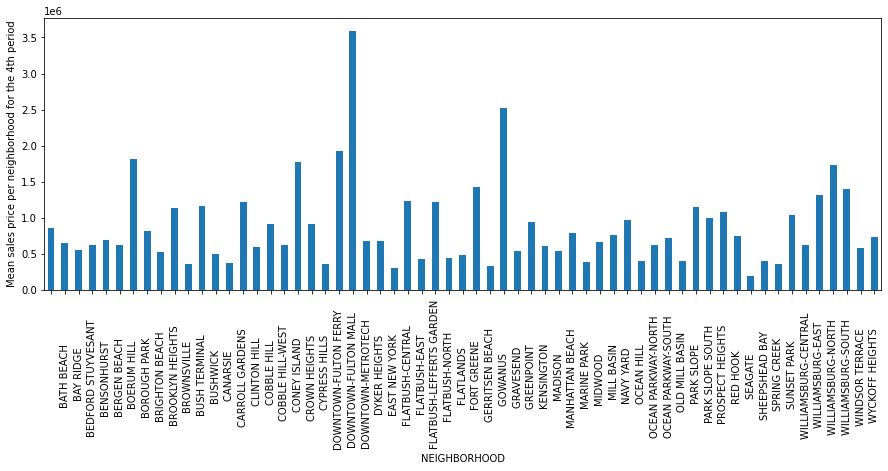

In [138]:
period_sales_2["SALE\nPRICE"].mean().plot.bar(figsize=(15, 5), ylabel="Mean sales price per neighborhood for the 2th period")

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='Mean sales price per neighborhood for the 4th period'>

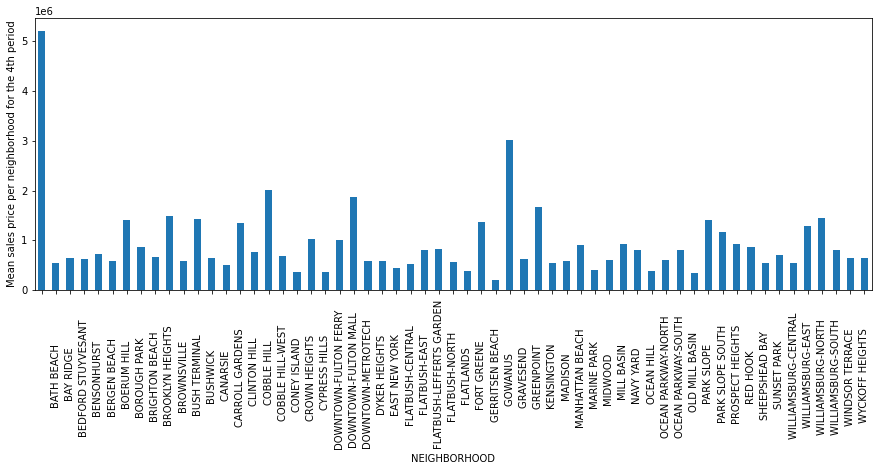

In [139]:
period_sales_3["SALE\nPRICE"].mean().plot.bar(figsize=(15, 5), ylabel="Mean sales price per neighborhood for the 3th period")

In [148]:
def yearBuiltGroup(year):
    if year == 0:
        return "Without date"
    elif year <= 1800:
        return "<=1800"
    elif year <= 1850:
        return "1801-1850"
    elif year <= 1900:
        return "1851-1900"
    elif year <= 1950:
        return "1901-1950"
    elif year <= 2000:
        return "1951-2000"
    else:
        return "2000>"

filtered_data["YEAR BUILT GROUP"] = filtered_data["YEAR BUILT"].apply(lambda x: yearBuiltGroup(x))
filtered_data


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE,YEAR BUILT GROUP
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,342 53RD STREET,,11220,...,0,0,0,0,0,2,R1,403572,2013-07-09,Without date
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,342 53RD STREET,,11220,...,0,0,0,0,0,2,R1,218010,2013-07-12,Without date
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,,290 GREENE AVE,,11238,...,0,0,0,0,0,2,R1,952311,2013-04-25,Without date
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,,290 GREENE AVE,,11238,...,0,0,0,0,0,2,R1,842692,2013-04-25,Without date
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,,290 GREENE AVE,,11238,...,0,0,0,0,0,2,R1,815288,2013-04-25,Without date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23360,3,WYCKOFF HEIGHTS,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,3250,1006,R1,137 ST NICHOLAS AVENUE,3B,11237,...,0,1,0,0,1931,2,R1,324480,2012-11-15,1901-1950
23362,3,WYCKOFF HEIGHTS,22 STORE BUILDINGS,4,3280,31,K9,146 WYCKOFF AVENUE,,11237,...,1,1,2535,5580,1931,4,K9,1200000,2013-04-24,1901-1950
23365,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3167,7,F4,1138 FLUSHING AVENUE,,11237,...,1,1,2454,2450,1931,4,F4,385000,2013-02-28,1901-1950
23367,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3407,34,G9,940-950 WYCKOFF AVENUE,,11237,...,1,1,7200,3000,1925,4,G9,1110000,2013-05-16,1901-1950


<AxesSubplot:xlabel='Period of building', ylabel='Number of buildings'>

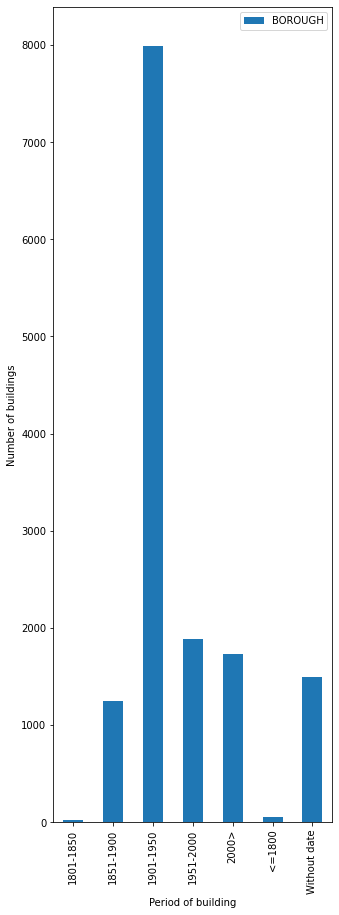

In [149]:
filtered_data.groupby("YEAR BUILT GROUP").count().plot.bar(
     y="BOROUGH",xlabel="Period of building", ylabel="Number of buildings", figsize=(5,15))

<ipython-input-150-757ca6d96ae8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_data.groupby("YEAR BUILT GROUP").mean().plot.bar(y="SALE\nPRICE")


<AxesSubplot:xlabel='YEAR BUILT GROUP'>

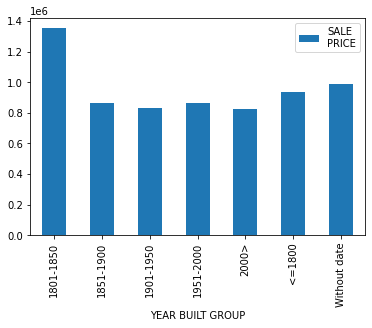

In [150]:
filtered_data.groupby("YEAR BUILT GROUP").mean().plot.bar(y="SALE\nPRICE")